# **Prétraitement des données**

## **Import des packages**

In [1]:
import os
import cv2
import glob
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps, ImageEnhance

## **Téléchargement et extraction des données**

In [2]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar -O /content/images.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar -O /content/annotation.tar

--2024-07-13 13:52:41--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘/content/images.tar’

/content/images.tar 100%[===================>] 756.82M  21.6MB/s    in 29s     

2024-07-13 13:53:10 (26.2 MB/s) - ‘/content/images.tar’ saved [793579520/793579520]

--2024-07-13 13:53:10--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘/content/annotation.tar’

/content/annotation 100%[===================>]  20.84M  15.8MB/s    in 1.3s    

2024-07-13 13:5

In [3]:
# Définir les chemins des fichiers tar
images_tar_path = '/content/images.tar'
annotations_tar_path = '/content/annotation.tar'

# Définir les chemins de destination
images_extract_path = '/content/images'
annotations_extract_path = '/content/annotations'

# Extraction des images
with tarfile.open(images_tar_path, 'r') as tar:
    tar.extractall(images_extract_path)

# Extraction des annotations
with tarfile.open(annotations_tar_path, 'r') as tar:
    tar.extractall(annotations_extract_path)

## **Exploration des données**

### **Affichage de quelques races de chiens**

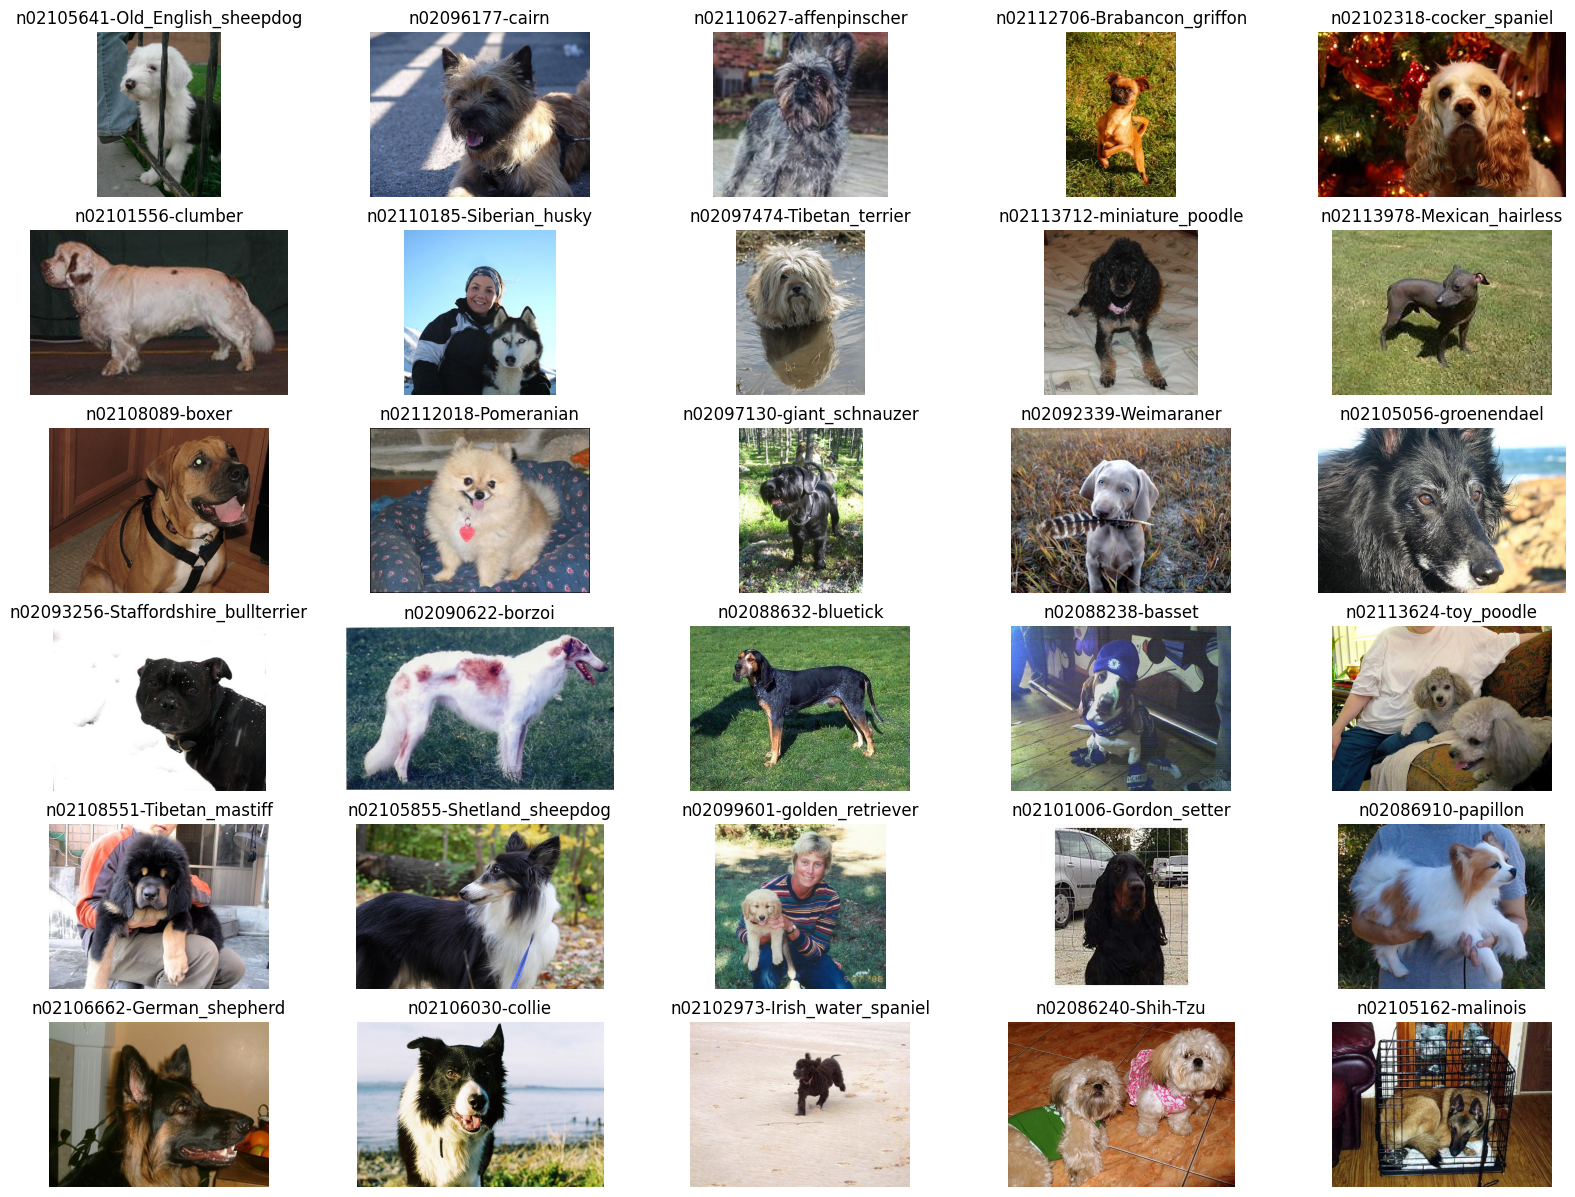

In [4]:
# Assurez-vous que les chemins des répertoires sont définis
images_path = images_extract_path

# Chemin du dossier contenant les sous-dossiers de classes de chiens
images_classes_path = os.path.join(images_path, 'Images')

def show_example_images(images_classes_path, num_examples=30):
    if os.path.exists(images_classes_path):
        classes = os.listdir(images_classes_path)
        plt.figure(figsize=(20, 15))

        # Limiter le nombre de classes à afficher
        classes_to_show = classes[:num_examples]

        for i, dog_class in enumerate(classes_to_show):
            class_path = os.path.join(images_classes_path, dog_class)
            if os.path.isdir(class_path):
                image_files = glob.glob(os.path.join(class_path, '*.jpg')) + \
                              glob.glob(os.path.join(class_path, '*.jpeg')) + \
                              glob.glob(os.path.join(class_path, '*.png'))
                if image_files:
                    # Charger une image
                    image_file = image_files[0]
                    image = mpimg.imread(image_file)

                    # Afficher l'image
                    plt.subplot(6, 5, i + 1)
                    plt.imshow(image)
                    plt.title(dog_class)
                    plt.axis('off')

        plt.show()
    else:
        print(f"Le répertoire {images_classes_path} n'existe pas.")

# Afficher quelques exemples d'images
show_example_images(images_classes_path)

### **Brève description des données**

In [6]:
# Chemin des images après extraction
images_path = images_extract_path  # Assurez-vous que cette variable est définie

# Chemin du dossier contenant les sous-dossiers de classes de chiens
images_classes_path = os.path.join(images_path, 'Images')

# Vérifier si le dossier des classes de chiens existe
if os.path.exists(images_classes_path):
    # Liste des dossiers de classes de chiens
    classes = os.listdir(images_classes_path)
    num_classes = len(classes)
    print(f'Nombre total de classes de chiens : {num_classes}')

    # Initialisation du compteur pour le nombre total d'images
    total_num_images = 0

    # Boucle pour compter le nombre total d'images
    for dog_class in classes:
        class_path = os.path.join(images_classes_path, dog_class)
        if os.path.isdir(class_path):
            # Trouver toutes les images dans le dossier de la classe actuelle
            image_files = glob.glob(os.path.join(class_path, '*'))
            total_num_images += len(image_files)

    # Afficher le nombre total d'images
    print(f'Nombre total d\'images : {total_num_images}\n')

    # Boucle pour afficher le nombre d'images par classe
    for dog_class in classes:
        class_path = os.path.join(images_classes_path, dog_class)
        if os.path.isdir(class_path):
            image_files = glob.glob(os.path.join(class_path, '*'))
            num_images = len(image_files)
            print(f'Classe : {dog_class} - Nombre d\'images : {num_images}')
else:
    print(f"Le répertoire {images_classes_path} n'existe pas.")

Nombre total de classes de chiens : 120
Nombre total d'images : 20580

Classe : n02105641-Old_English_sheepdog - Nombre d'images : 169
Classe : n02096177-cairn - Nombre d'images : 197
Classe : n02110627-affenpinscher - Nombre d'images : 150
Classe : n02112706-Brabancon_griffon - Nombre d'images : 153
Classe : n02102318-cocker_spaniel - Nombre d'images : 159
Classe : n02101556-clumber - Nombre d'images : 150
Classe : n02110185-Siberian_husky - Nombre d'images : 192
Classe : n02097474-Tibetan_terrier - Nombre d'images : 206
Classe : n02113712-miniature_poodle - Nombre d'images : 155
Classe : n02113978-Mexican_hairless - Nombre d'images : 155
Classe : n02108089-boxer - Nombre d'images : 151
Classe : n02112018-Pomeranian - Nombre d'images : 219
Classe : n02097130-giant_schnauzer - Nombre d'images : 157
Classe : n02092339-Weimaraner - Nombre d'images : 160
Classe : n02105056-groenendael - Nombre d'images : 150
Classe : n02093256-Staffordshire_bullterrier - Nombre d'images : 155
Classe : n02

In [7]:
def get_images_shapes(images_classes_path):
    image_shapes = []
    if os.path.exists(images_classes_path):
        classes = os.listdir(images_classes_path)

        for dog_class in classes:
            class_path = os.path.join(images_classes_path, dog_class)
            if os.path.isdir(class_path):
                image_files = glob.glob(os.path.join(class_path, '*.jpg')) + \
                              glob.glob(os.path.join(class_path, '*.jpeg')) + \
                              glob.glob(os.path.join(class_path, '*.png'))
                for image_file in image_files:
                    with Image.open(image_file) as img:
                        image_shapes.append(img.size + (len(img.getbands()),))  # (width, height, channels)
    return np.array(image_shapes)

# Obtenir les formes des images
image_shapes = get_images_shapes(images_classes_path)

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement (images) :", image_shapes.shape)
print("Exemple de formes d'images :", image_shapes[:10])

Forme de l'ensemble d'entraînement (images) : (20580, 3)
Exemple de formes d'images : [[375 500   3]
 [440 446   3]
 [500 333   3]
 [500 401   3]
 [500 375   3]
 [376 500   3]
 [500 333   3]
 [375 500   3]
 [332 500   3]
 [432 324   3]]


## **Tranformations des images**

### **Exemple de tranformations de quelques images**

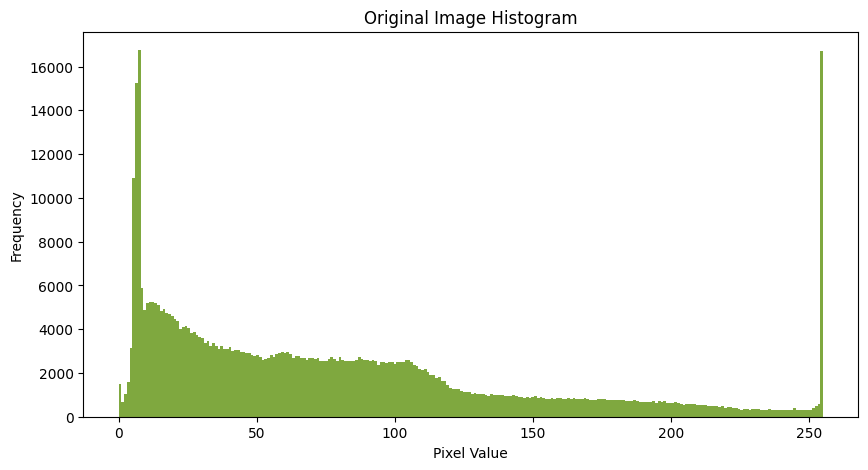

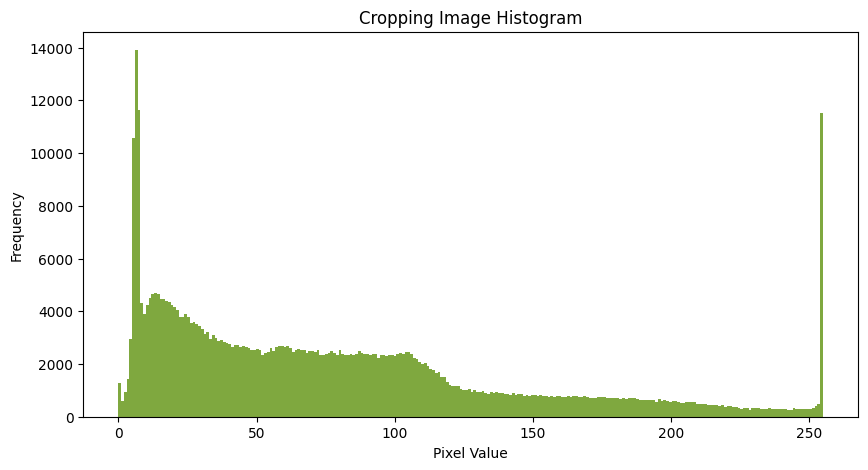

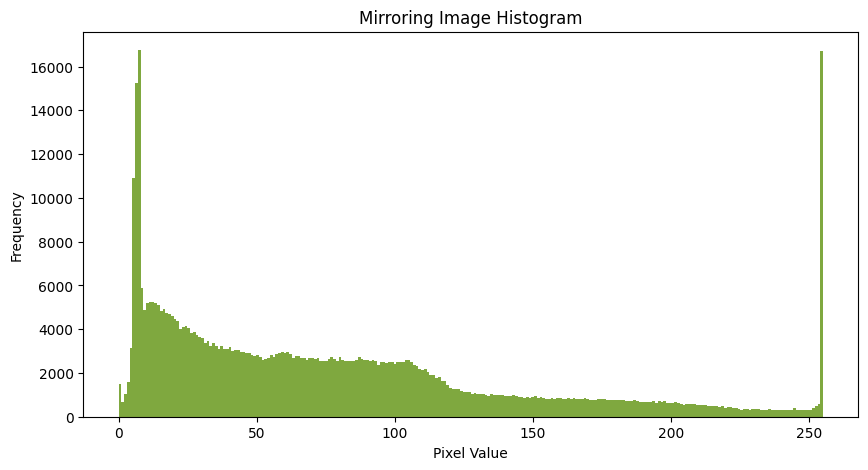

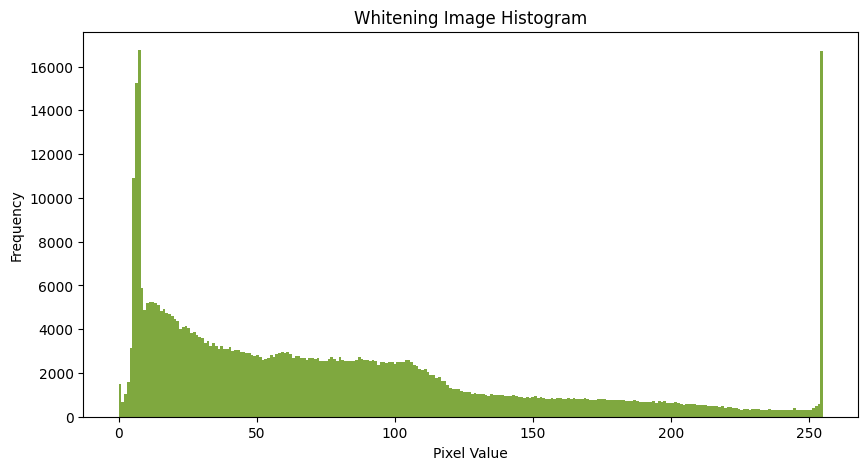

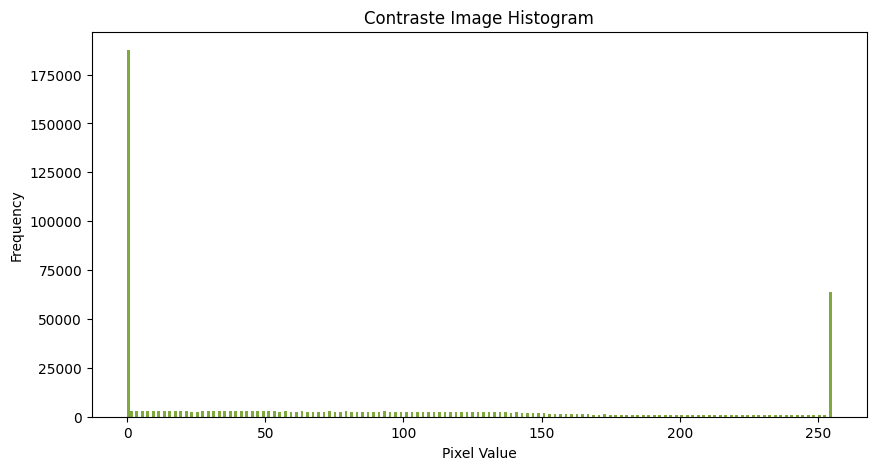

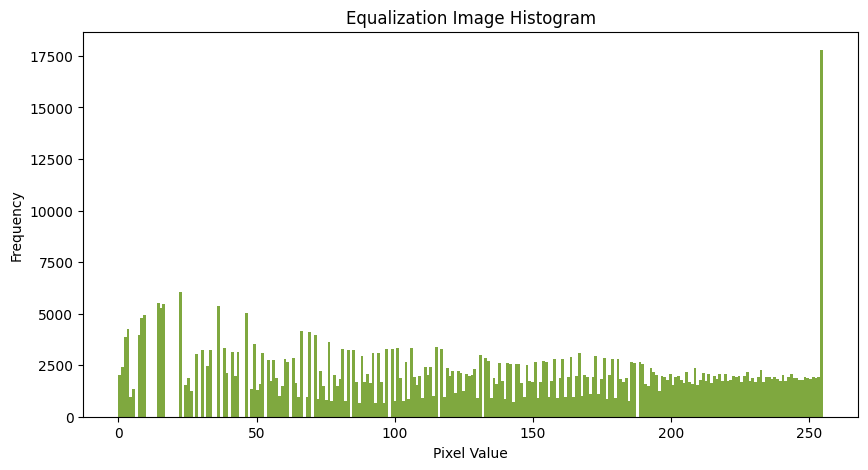

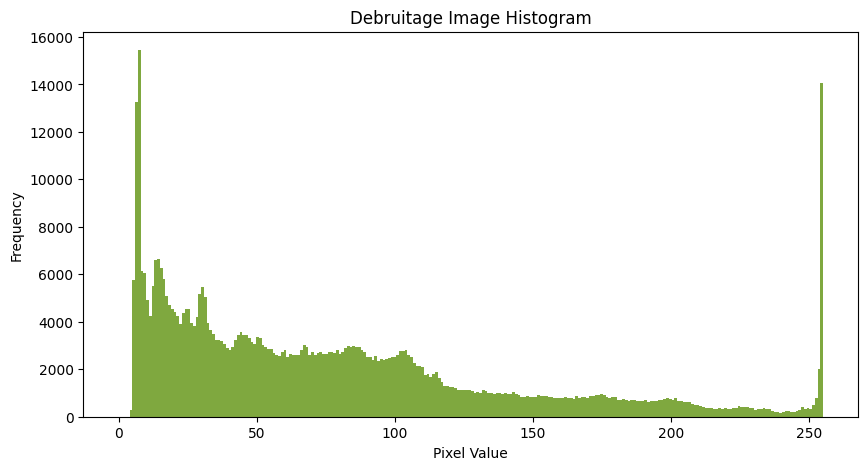

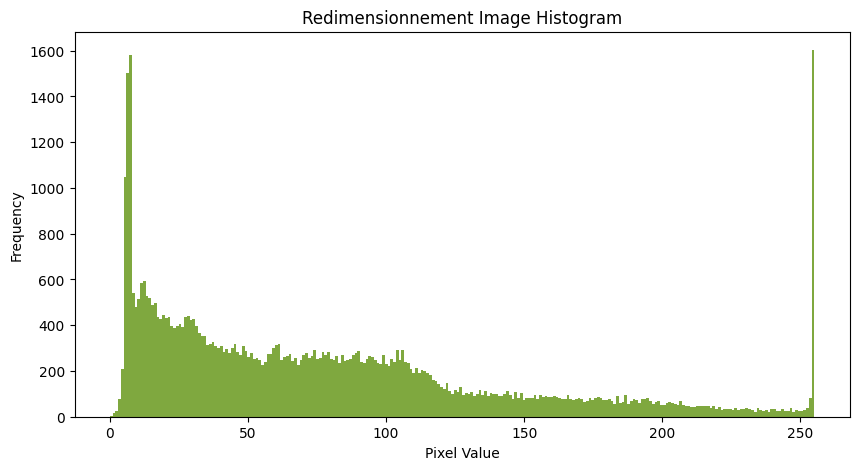

In [8]:
# Fonction pour afficher l'histogramme d'une image
def plot_histogram(image, title):
    plt.figure(figsize=(10, 5))
    plt.hist(np.array(image).ravel(), bins=256, color='orange', alpha=0.5)
    plt.hist(np.array(image).ravel(), bins=256, color='green', alpha=0.5)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Fonction pour charger une image
def load_image(image_path):
    return Image.open(image_path)

# Chemin de l'image à traiter
sample_image_path = '/content/images/Images/n02085620-Chihuahua/n02085620_10074.jpg'

# Charger l'image
image = load_image(sample_image_path)

# Liste des transformations à appliquer
transformations = {
    'cropping': lambda img: img.crop((10, 10, img.width-10, img.height-10)),
    'mirroring': ImageOps.mirror,
    'whitening': lambda img: ImageOps.autocontrast(img, cutoff=0),
    'contraste': lambda img: ImageEnhance.Contrast(img).enhance(2),
    'equalization': ImageOps.equalize,
    'debruitage': lambda img: Image.fromarray(cv2.fastNlMeansDenoising(np.array(img), None, 30, 7, 21)),
    'redimensionnement': lambda img: img.resize((128, 128))
}

# Affichage de l'image originale et de son histogramme
image.show()
plot_histogram(image, 'Original Image Histogram')

# Application des transformations et affichage des résultats
for name, transform in transformations.items():
    transformed_image = transform(image)
    transformed_image.show()
    plot_histogram(transformed_image, f'{name.capitalize()} Image Histogram')

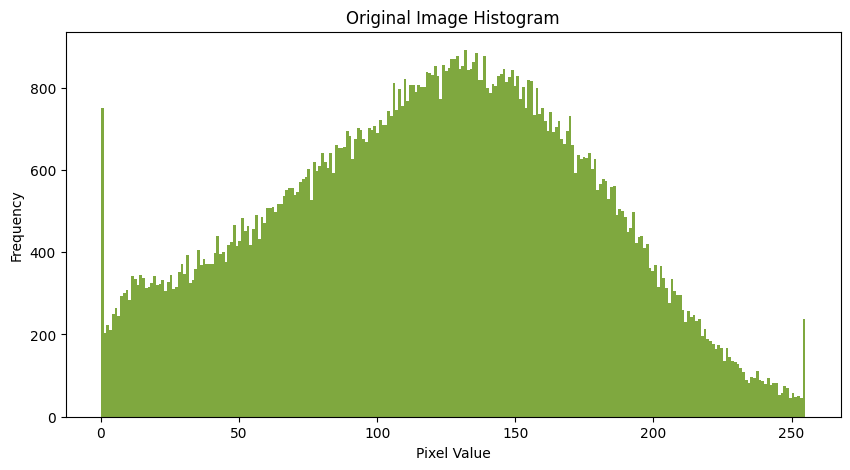

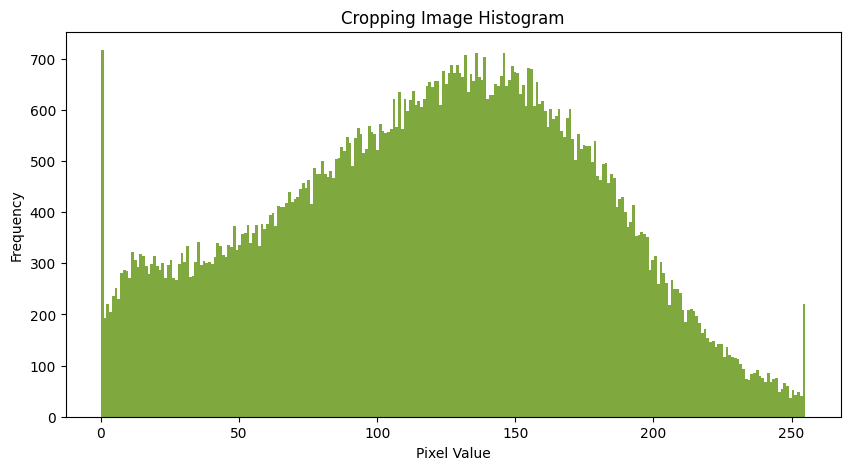

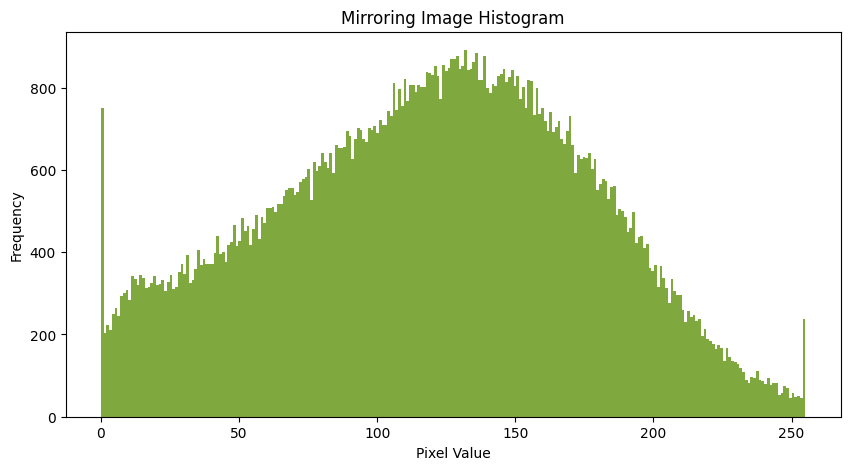

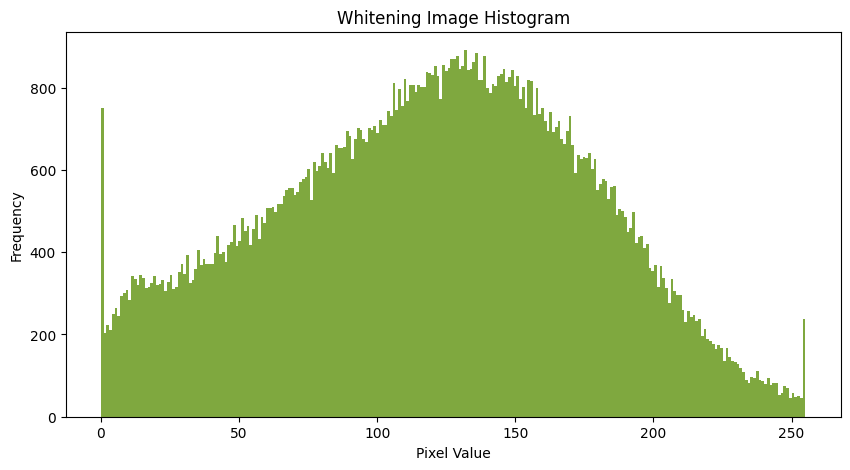

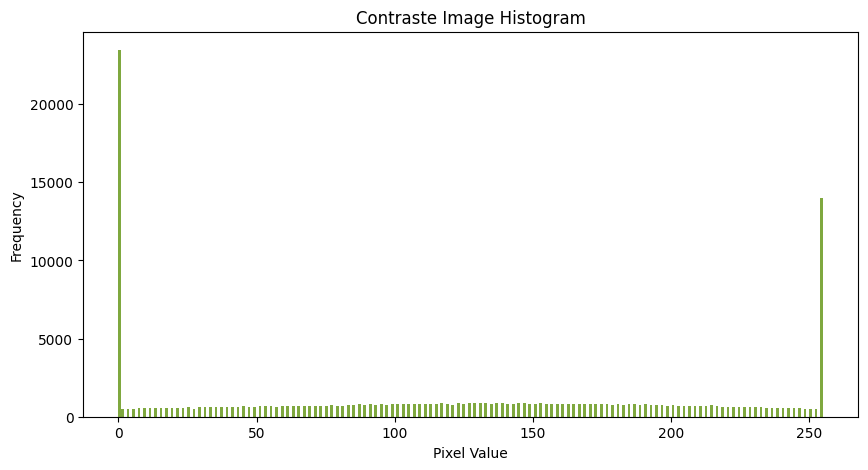

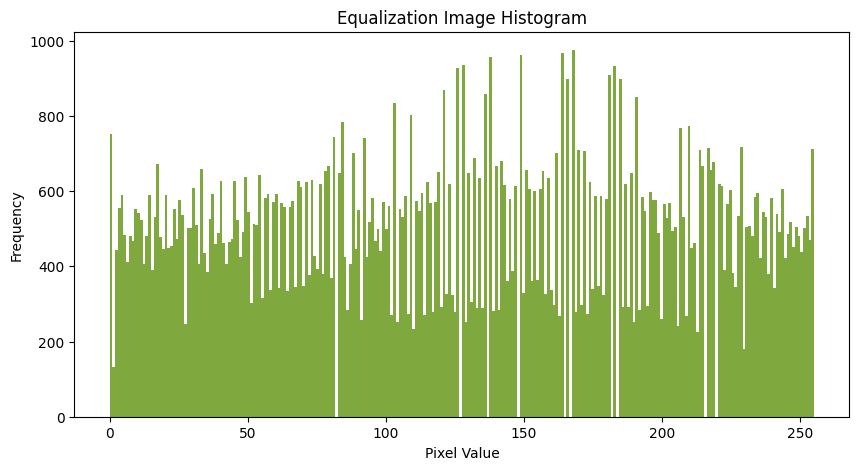

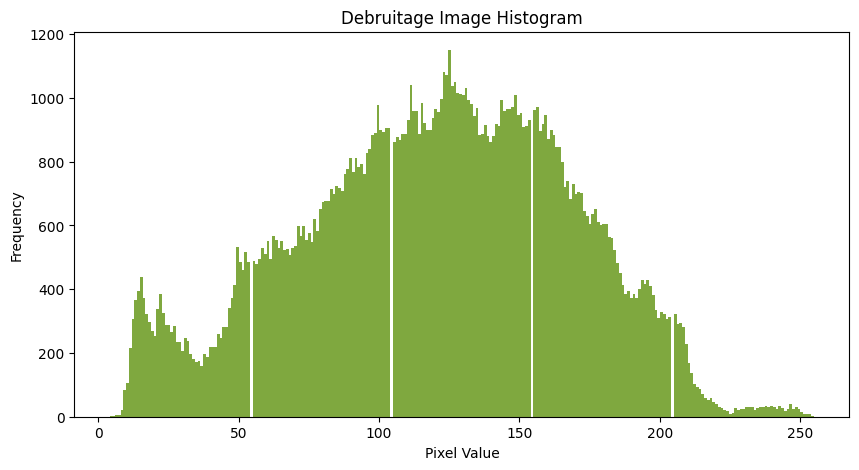

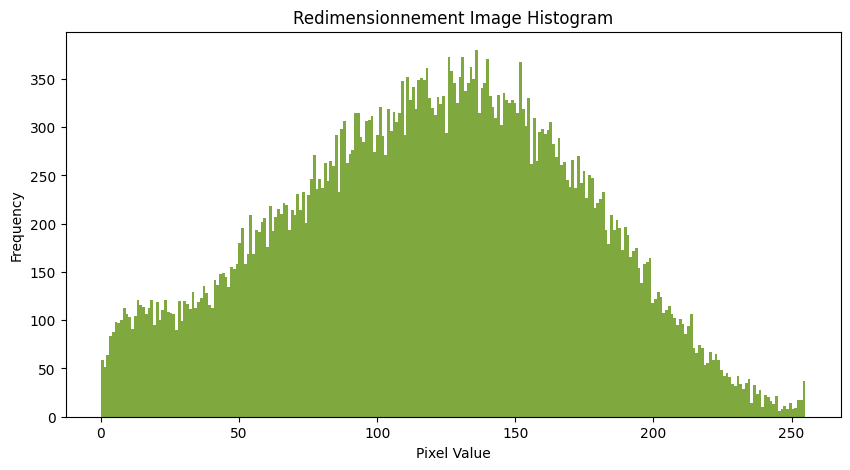

In [9]:
# Fonction pour afficher l'histogramme d'une image
def plot_histogram(image, title):
    plt.figure(figsize=(10, 5))
    plt.hist(np.array(image).ravel(), bins=256, color='orange', alpha=0.5)
    plt.hist(np.array(image).ravel(), bins=256, color='green', alpha=0.5)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Fonction pour charger une image
def load_image(image_path):
    return Image.open(image_path)

# Chemin de l'image à traiter
sample_image_path = '/content/images/Images/n02116738-African_hunting_dog/n02116738_10024.jpg'

# Charger l'image
image = load_image(sample_image_path)

# Liste des transformations à appliquer
transformations = {
    'cropping': lambda img: img.crop((10, 10, img.width-10, img.height-10)),
    'mirroring': ImageOps.mirror,
    'whitening': lambda img: ImageOps.autocontrast(img, cutoff=0),
    'contraste': lambda img: ImageEnhance.Contrast(img).enhance(2),
    'equalization': ImageOps.equalize,
    'debruitage': lambda img: Image.fromarray(cv2.fastNlMeansDenoising(np.array(img), None, 30, 7, 21)),
    'redimensionnement': lambda img: img.resize((128, 128))
}

# Affichage de l'image originale et de son histogramme
image.show()
plot_histogram(image, 'Original Image Histogram')

# Application des transformations et affichage des résultats
for name, transform in transformations.items():
    transformed_image = transform(image)
    transformed_image.show()
    plot_histogram(transformed_image, f'{name.capitalize()} Image Histogram')

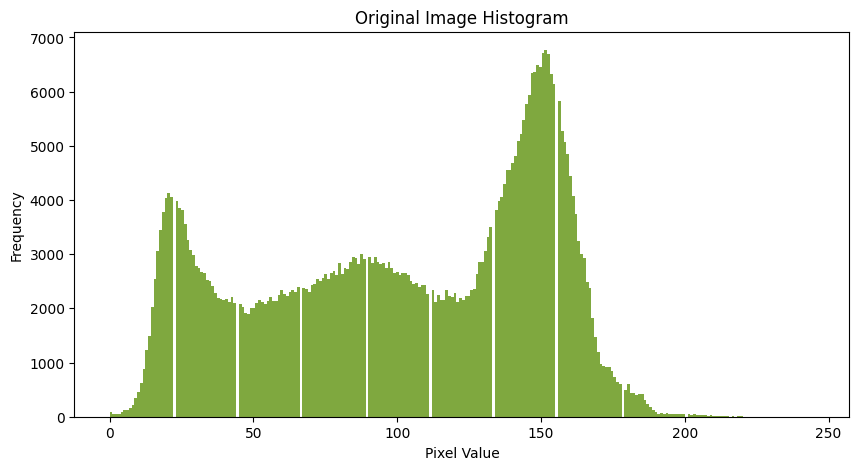

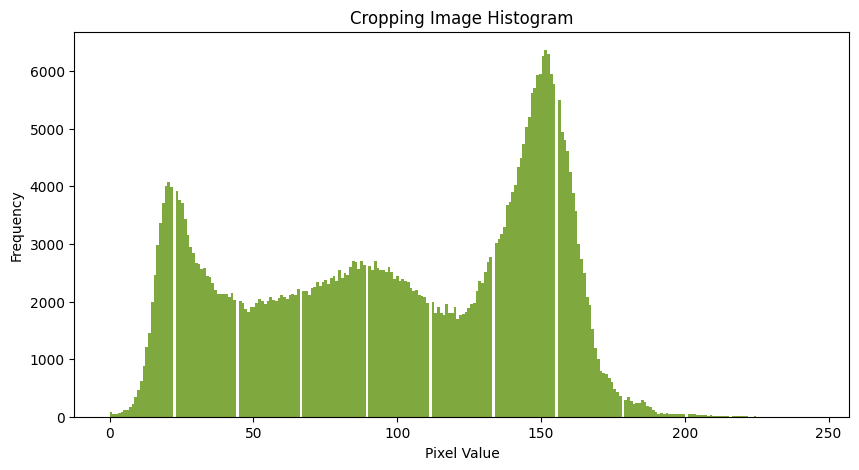

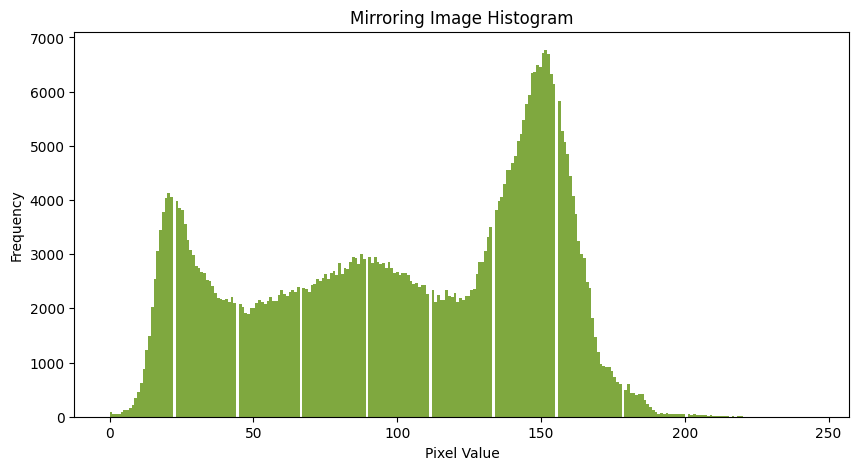

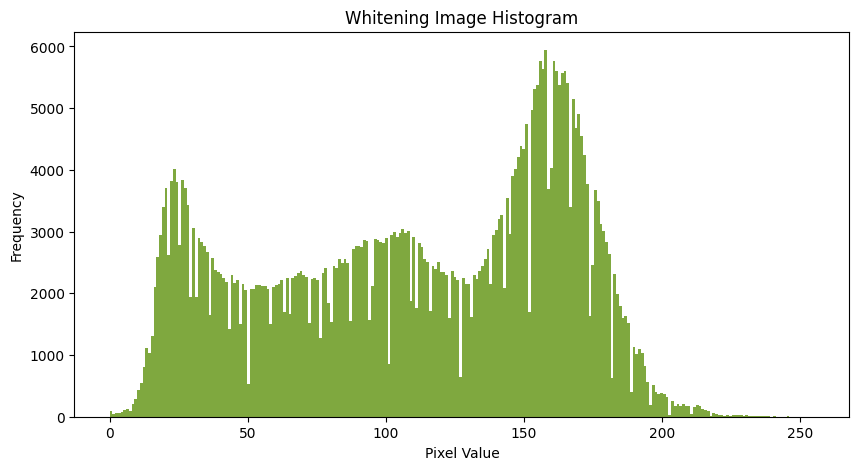

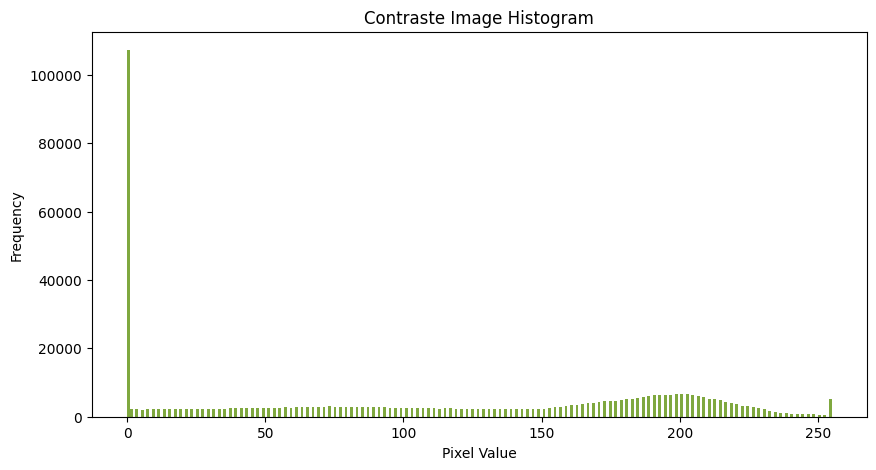

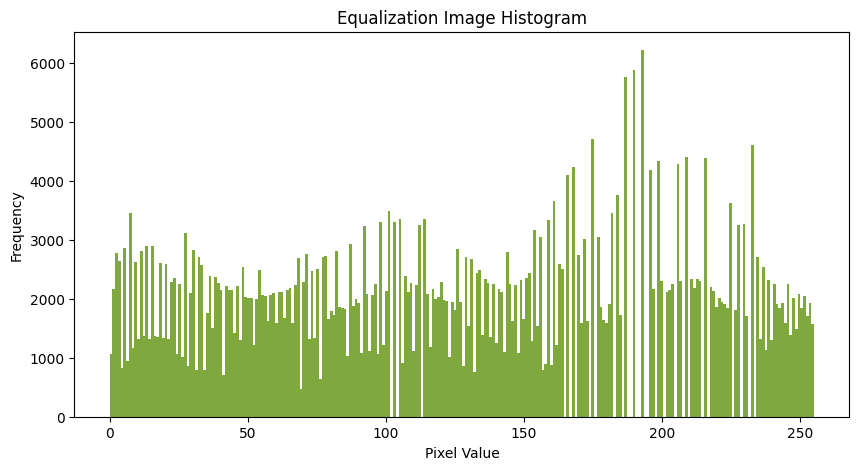

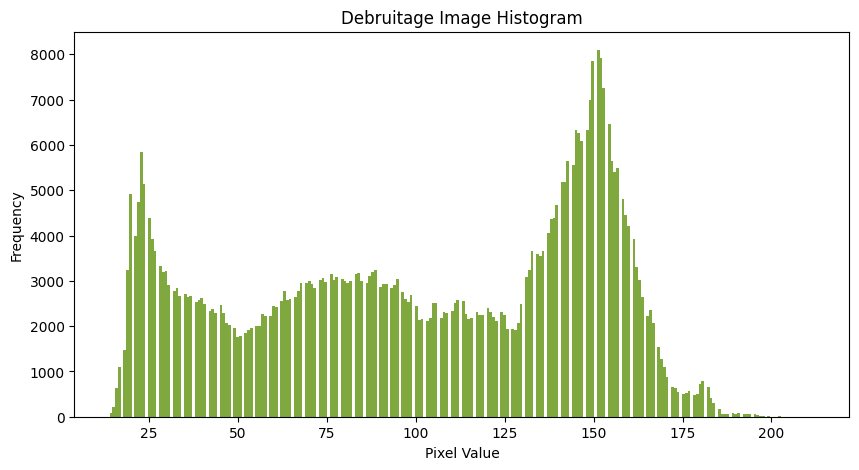

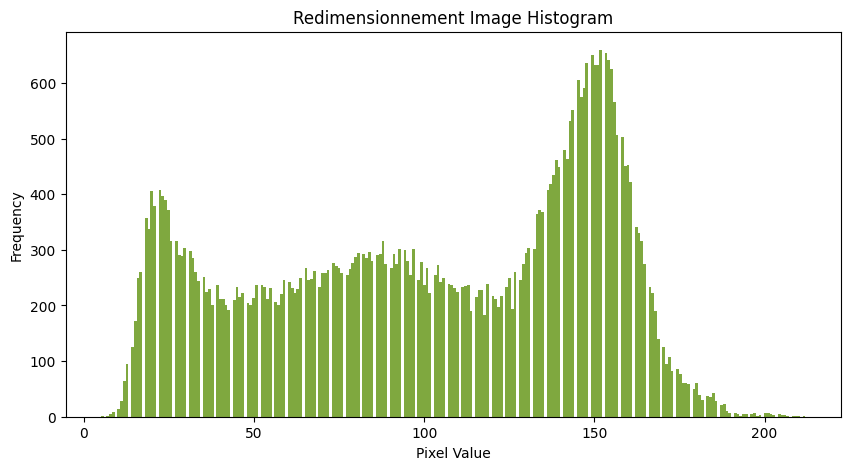

In [10]:
# Fonction pour afficher l'histogramme d'une image
def plot_histogram(image, title):
    plt.figure(figsize=(10, 5))
    plt.hist(np.array(image).ravel(), bins=256, color='orange', alpha=0.5)
    plt.hist(np.array(image).ravel(), bins=256, color='green', alpha=0.5)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Fonction pour charger une image
def load_image(image_path):
    return Image.open(image_path)

# Chemin de l'image à traiter
sample_image_path = '/content/images/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg'

# Charger l'image
image = load_image(sample_image_path)

# Liste des transformations à appliquer
transformations = {
    'cropping': lambda img: img.crop((10, 10, img.width-10, img.height-10)),
    'mirroring': ImageOps.mirror,
    'whitening': lambda img: ImageOps.autocontrast(img, cutoff=0),
    'contraste': lambda img: ImageEnhance.Contrast(img).enhance(2),
    'equalization': ImageOps.equalize,
    'debruitage': lambda img: Image.fromarray(cv2.fastNlMeansDenoising(np.array(img), None, 30, 7, 21)),
    'redimensionnement': lambda img: img.resize((128, 128))
}

# Affichage de l'image originale et de son histogramme
image.show()
plot_histogram(image, 'Original Image Histogram')

# Application des transformations et affichage des résultats
for name, transform in transformations.items():
    transformed_image = transform(image)
    transformed_image.show()
    plot_histogram(transformed_image, f'{name.capitalize()} Image Histogram')

### **Applications des transformations à toutes les images**

In [11]:
# Chemin des images à traiter
images_folder = '/content/images/Images'

# Liste des transformations à appliquer
transformations = {
    'cropping': lambda img: img.crop((10, 10, img.width-10, img.height-10)),
    'mirroring': ImageOps.mirror,
    'whitening': lambda img: ImageOps.autocontrast(img, cutoff=0),
    'contraste': lambda img: ImageEnhance.Contrast(img).enhance(2),
    'equalization': ImageOps.equalize,
    'debruitage': lambda img: Image.fromarray(cv2.fastNlMeansDenoising(np.array(img), None, 30, 7, 21)),
    'redimensionnement': lambda img: img.resize((128, 128))
}

# Chemin où sauvegarder les images transformées
output_folder = '/content/transformed_images'

# Créer le dossier de sortie s'il n'existe pas
os.makedirs(output_folder, exist_ok=True)

# Limite de traitement pour le test
max_images_per_class = 100

# Parcourir chaque sous-dossier dans le dossier des images
for class_name in os.listdir(images_folder):
    class_folder = os.path.join(images_folder, class_name)
    if os.path.isdir(class_folder):
        # Créer le dossier de classe dans le dossier de sortie
        class_output_folder = os.path.join(output_folder, class_name)
        os.makedirs(class_output_folder, exist_ok=True)

        # Liste des fichiers d'images dans le sous-dossier de classe
        image_files = [f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]

        # Limiter le nombre d'images à traiter pour le test
        image_files = image_files[:max_images_per_class]

        # Parcourir chaque image et appliquer les transformations
        for image_file in image_files:
            try:
                # Charger l'image
                image_path = os.path.join(class_folder, image_file)
                image = Image.open(image_path)

                # Afficher le nom de l'image en cours de traitement
                print(f'Traitement de l\'image {image_file} dans la classe {class_name}')

                # Appliquer chaque transformation
                for name, transform in transformations.items():
                    transformed_image = transform(image)

                    # Sauvegarder l'image transformée
                    transformed_image_path = os.path.join(class_output_folder, f'{os.path.splitext(image_file)[0]}_{name}.jpg')
                    transformed_image.save(transformed_image_path)
                    print(f'Sauvegardé : {transformed_image_path}')

            except Exception as e:
                print(f"Erreur lors du traitement de l'image {image_file} dans la classe {class_name}: {e}")

print("Transformation et sauvegarde terminées.")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_cropping.jpg
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_mirroring.jpg
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_whitening.jpg
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_contraste.jpg
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_equalization.jpg
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_debruitage.jpg
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_10139_redimensionnement.jpg
Traitement de l'image n02100735_4540.jpg dans la classe n02100735-English_setter
Sauvegardé : /content/transformed_images/n02100735-English_setter/n02100735_4540_cropping.jpg
Sauvegardé : /content/transformed_images/n02100735-English_sette

## **Sauvegarde des images transformées dans le drive**

In [12]:
# Exemple de sauvegarde dans Google Drive
output_folder = '/content/drive/My Drive/transformed_images'

# Chemin vers les fichiers traités dans le premier notebook
processed_images_folder = '/content/transformed_images'

# Copier les fichiers vers Google Drive
import shutil

# Vérifier si le dossier existe et créer si nécessaire
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Copier les fichiers
shutil.copytree(processed_images_folder, output_folder, dirs_exist_ok=True)

'/content/drive/My Drive/transformed_images'